# Sentiment Analysis on Comments Data from Hacker News Website

**Import the libraries and get the data**

In [125]:
# Import the libraries
import requests
import json
import pandas as pd
import time
from random import randint
from bs4 import BeautifulSoup
from textblob import Word
from nltk.corpus import stopwords

# Fetch a web page
r = requests.get("https://news.ycombinator.com/newcomments")
print(r.text)

<html op="newcomments"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?tThICE41XKkC2yDxMVKx">
            <link rel="shortcut icon" href="favicon.ico">
        <title>New Comments | Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
              <a href="newest">new</a> | <a href="front">past</a> | <span class="topsel"><a href="newcomments">comments</a></span> | <a href="a

**Remove the HTML tags**

In [126]:
# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.get_text())


            
        New Comments | Hacker News
        
                  Hacker News
              new | past | comments | ask | show | jobs | submit            
                              login
                          
              

              
          m1k1 0 minutes ago  | parent            | on: Microsoft Access: The Database Software That Won't...
                  
                  I even had point and click access on "information technology" course on the life sciences faculy on of the biggest polish university ~7 years ago
              
    
                
          cryptica 0 minutes ago  | parent            | on: The crisis in physics is not only about physics
                  
                  Please respect the people who have to work grueling, repetitive and unpleasant jobs to put food on your table and a roof over your head. Scientists are responsible for those people.
              
    
                
          ivanhoe 0 minutes ago  | parent      

**Find the comments**

In [129]:
# Find all comments
comments = soup.find_all('div', class_='comment')
print('There are {} number of comments found on the first page'.format(len(comments)))
print(comments)

There are 30 number of comments found on the first page
[<div class="comment">
                  <span class="commtext c00">I even had point and click access on "information technology" course on the life sciences faculy on of the biggest polish university ~7 years ago</span>
              <div class="reply"></div></div>, <div class="comment">
                  <span class="commtext c00">Please respect the people who have to work grueling, repetitive and unpleasant jobs to put food on your table and a roof over your head. Scientists are responsible for those people.</span>
              <div class="reply"></div></div>, <div class="comment">
                  <span class="commtext c00">Weird that there seems to be much more debate in US about force feeding geese than force-feeding prisoners.</span>
              <div class="reply"></div></div>, <div class="comment">
                  <span class="commtext c00">Your infrequent reminder:<p><i>Goodhart’s curse: Every metric that can be tra

In [130]:
# Example of the comment
comments[0].find("span", class_="commtext c00").get_text().strip()

'I even had point and click access on "information technology" course on the life sciences faculy on of the biggest polish university ~7 years ago'

In [131]:
# Extract all comments
clean_comments = []
for comment in comments:
    tmp = comment.find("span", class_="commtext c00").get_text().strip()
    clean_comments.append(tmp)

print(len(clean_comments), "Article summaries found. Sample:")
print(clean_comments[0])

30 Article summaries found. Sample:
I even had point and click access on "information technology" course on the life sciences faculy on of the biggest polish university ~7 years ago


In [132]:
# Create unique id for each comment
id_comments = [i for i in range(len(clean_comments))]

In [133]:
# Create dataframe from the data
df_dict = {'id':id_comments, 'comment':clean_comments}
data = pd.DataFrame(df_dict)
display(data.head())

,id,comment
0,0,"I even had point and click access on ""informat..."
1,1,Please respect the people who have to work gru...
2,2,Weird that there seems to be much more debate ...
3,3,Your infrequent reminder:Goodhart’s curse: Eve...
4,4,Do you (always?) realise that need before the ...


**Case normalization**

In [134]:
# Convert to lowercase
data['comment'] = data['comment'].str.lower()
display(data.head())

,id,comment
0,0,"i even had point and click access on ""informat..."
1,1,please respect the people who have to work gru...
2,2,weird that there seems to be much more debate ...
3,3,your infrequent reminder:goodhart’s curse: eve...
4,4,do you (always?) realise that need before the ...


**Punctuation removal**

In [135]:
# Punctuation removal
data['comment'] = data['comment'].str.replace('[^a-zA-Z0-9]', ' ')
display(data.head())

,id,comment
0,0,i even had point and click access on informat...
1,1,please respect the people who have to work gru...
2,2,weird that there seems to be much more debate ...
3,3,your infrequent reminder goodhart s curse eve...
4,4,do you always realise that need before the ...


**Remove stop words**

In [136]:
# Remove stop words
data['comment'] = data['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords.words('english')))
display(data.head())

,id,comment
0,0,even point click access information technology...
1,1,please respect people work grueling repetitive...
2,2,weird seems much debate us force feeding geese...
3,3,infrequent reminder goodhart curse every metri...
4,4,always realise need product made


**Lemmatization**

In [137]:
# Lemmatize each words
data['comment'] = data['comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
display(data.head())

,id,comment
0,0,even point click access information technology...
1,1,please respect people work grueling repetitive...
2,2,weird seems much debate u force feeding goose ...
3,3,infrequent reminder goodhart curse every metri...
4,4,always realise need product made


**Sentiment labeling**

In [138]:
data_label = data.copy()
text = data_label['comment']

In [139]:
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    data_label.set_value(i,'sentiment', sentiment)
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        data_label.set_value(i, 'sentimentclass', sentimentclass)
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        data_label.set_value(i, 'sentimentclass', sentimentclass)
    else :
        sentimentclass = ' Netral'
        data_label.set_value(i, 'sentimentclass', sentimentclass)

C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.pat

In [140]:
data_label.head()

,id,comment,sentiment,sentimentclass
0,0,even point click access information technology...,0.000000,Netral
1,1,please respect people work grueling repetitive...,-0.233333,Negative
2,2,weird seems much debate u force feeding goose ...,-0.150000,Negative
3,3,infrequent reminder goodhart curse every metri...,0.000000,Netral
4,4,always realise need product made,0.000000,Netral


**Sentiments distribution**

In [141]:
#count sentiment 
sentiment = data_label.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['comments_count'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['comments_count']/chart['comments_count'].sum()
display(chart)

,sentimentclass,comments_count,percent
0,Netral,6,0.200000
1,Negative,8,0.266667
2,Positive,16,0.533333


**Plot sentiments distribution**

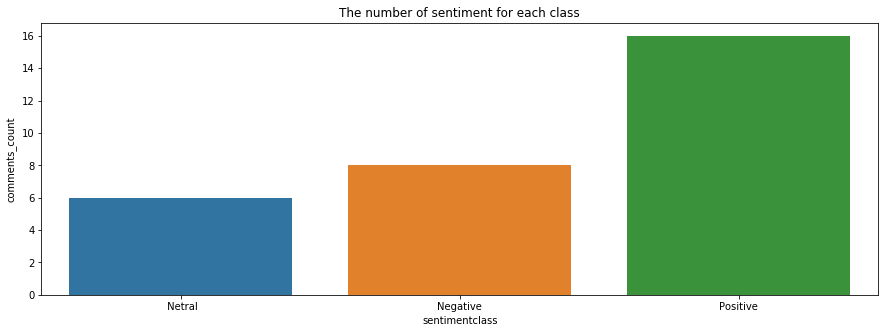

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
#make a barchar
plt.figure(figsize=(15,5 ))
ax = sns.barplot(x= 'sentimentclass', y='comments_count', data=chart)
ax = ax.set_title('The number of sentiment for each class') 